<a href="https://colab.research.google.com/github/sujitojha1/ERA1/blob/main/Session8/ERA1_S8_CIFAR10_GroupNorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Module and Models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Future print function
from __future__ import print_function

# Load modules/models from EVA course
!git clone https://github.com/sujitojha1/ERA1 -q --quiet
!mv ERA1/Session8/*.py .
!rm -rf ERA1
print("Loaded Modules and Models")

# Installing latest Albumentation library
!pip install -U git+https://github.com/albu/albumentations -q --quiet

# For inline matplotlib plotting
%matplotlib inline

Loaded Modules and Models
  Preparing metadata (setup.py) ... done


## Loading train and test data with transforms and loader functions



In [3]:
from data_loader import *

# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:12<00:00, 13229081.50it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


## Exploratory Data Analysis


### Summary Statistics

In [4]:
cifar10.data_summary_stats()

Files already downloaded and verified
Files already downloaded and verified
(60000, 32, 32, 3)
[0.49186878 0.48265391 0.44717728]
[0.24697121 0.24338894 0.26159259]


### Plotting sample images

Files already downloaded and verified


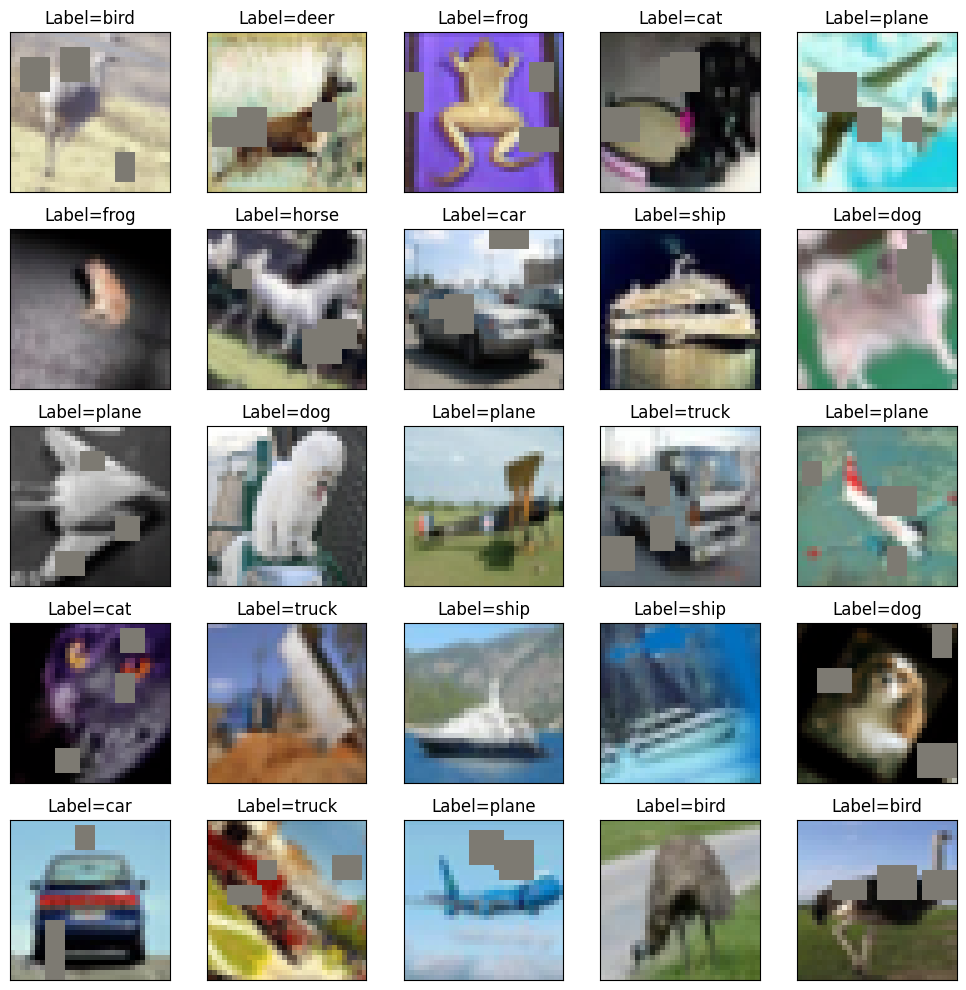

In [5]:
cifar10.sample_pictures(train_flag=True)

## The Model

In [6]:
from model import *

# Loading Custom Model
net = Net(normalizationMethod='GN')

# Using cuda if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

# Sending network to device
net = net.to(device)

cuda


## Model Summary



In [7]:
!pip install torchsummary
from torchsummary import summary

# Model Summary
summary(net, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 64, 32, 32]           9,216
              ReLU-5           [-1, 64, 32, 32]               0
         GroupNorm-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 64, 32, 32]             576
              ReLU-8           [-1, 64, 32, 32]               0
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 16, 32, 32]           1,024
             ReLU-11           [-1, 16, 32, 32]               0
        GroupNorm-12           [-1, 16, 32, 32]              32
    

## Define a Loss function and optimizer

In [8]:
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)

## Training and Testing

In [9]:
# Load train and test model
from main import *

train = train()
test = test()

EPOCHS= 20

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    train.execute(net, device, trainloader, optimizer, criterion, epoch)
    scheduler.step()
    test.execute(net, device, testloader, criterion)

print('Finished Training')

Epoch: 0,Loss=1.68 Batch_id=390 Accuracy=35.56: 100%|██████████| 391/391 [00:22<00:00, 17.72it/s]


Test set: Average loss: 0.0121, Accuracy: 4528/10000 (45.28%)



Epoch: 1,Loss=1.46 Batch_id=390 Accuracy=44.10: 100%|██████████| 391/391 [00:17<00:00, 22.39it/s]


Test set: Average loss: 0.0111, Accuracy: 5014/10000 (50.14%)



Epoch: 2,Loss=1.39 Batch_id=390 Accuracy=47.93: 100%|██████████| 391/391 [00:18<00:00, 20.93it/s]


Test set: Average loss: 0.0099, Accuracy: 5310/10000 (53.10%)



Epoch: 3,Loss=1.57 Batch_id=390 Accuracy=50.90: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]


Test set: Average loss: 0.0095, Accuracy: 5618/10000 (56.18%)



Epoch: 4,Loss=1.34 Batch_id=390 Accuracy=52.95: 100%|██████████| 391/391 [00:18<00:00, 20.92it/s]


Test set: Average loss: 0.0105, Accuracy: 5339/10000 (53.39%)



Epoch: 5,Loss=1.35 Batch_id=390 Accuracy=55.16: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.0089, Accuracy: 5977/10000 (59.77%)



Epoch: 6,Loss=0.89 Batch_id=390 Accuracy=61.20: 100%|██████████| 391/391 [00:18<00:00, 21.04it/s]


Test set: Average loss: 0.0077, Accuracy: 6598/10000 (65.98%)



Epoch: 7,Loss=1.23 Batch_id=390 Accuracy=61.92: 100%|██████████| 391/391 [00:17<00:00, 21.75it/s]


Test set: Average loss: 0.0076, Accuracy: 6586/10000 (65.86%)



Epoch: 8,Loss=1.36 Batch_id=390 Accuracy=62.83: 100%|██████████| 391/391 [00:18<00:00, 21.64it/s]


Test set: Average loss: 0.0075, Accuracy: 6684/10000 (66.84%)



Epoch: 9,Loss=0.87 Batch_id=390 Accuracy=63.52: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]


Test set: Average loss: 0.0072, Accuracy: 6759/10000 (67.59%)



Epoch: 10,Loss=1.16 Batch_id=390 Accuracy=63.37: 100%|██████████| 391/391 [00:17<00:00, 21.99it/s]


Test set: Average loss: 0.0075, Accuracy: 6695/10000 (66.95%)



Epoch: 11,Loss=0.93 Batch_id=390 Accuracy=64.00: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]


Test set: Average loss: 0.0071, Accuracy: 6848/10000 (68.48%)



Epoch: 12,Loss=0.81 Batch_id=390 Accuracy=65.66: 100%|██████████| 391/391 [00:18<00:00, 21.52it/s]


Test set: Average loss: 0.0069, Accuracy: 6962/10000 (69.62%)



Epoch: 13,Loss=0.94 Batch_id=390 Accuracy=65.85: 100%|██████████| 391/391 [00:18<00:00, 20.84it/s]


Test set: Average loss: 0.0069, Accuracy: 6964/10000 (69.64%)



Epoch: 14,Loss=1.13 Batch_id=390 Accuracy=66.17: 100%|██████████| 391/391 [00:19<00:00, 20.02it/s]


Test set: Average loss: 0.0068, Accuracy: 6997/10000 (69.97%)



Epoch: 15,Loss=0.90 Batch_id=390 Accuracy=66.36: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]


Test set: Average loss: 0.0068, Accuracy: 6995/10000 (69.95%)



Epoch: 16,Loss=1.12 Batch_id=390 Accuracy=66.24: 100%|██████████| 391/391 [00:19<00:00, 20.28it/s]


Test set: Average loss: 0.0068, Accuracy: 7008/10000 (70.08%)



Epoch: 17,Loss=0.89 Batch_id=390 Accuracy=66.47: 100%|██████████| 391/391 [00:18<00:00, 21.12it/s]


Test set: Average loss: 0.0067, Accuracy: 7013/10000 (70.13%)



Epoch: 18,Loss=0.75 Batch_id=390 Accuracy=66.71: 100%|██████████| 391/391 [00:17<00:00, 21.88it/s]


Test set: Average loss: 0.0067, Accuracy: 7040/10000 (70.40%)



Epoch: 19,Loss=1.10 Batch_id=390 Accuracy=67.30: 100%|██████████| 391/391 [00:19<00:00, 20.56it/s]


Test set: Average loss: 0.0067, Accuracy: 7037/10000 (70.37%)

Finished Training


## Display an image from the test set

Files already downloaded and verified


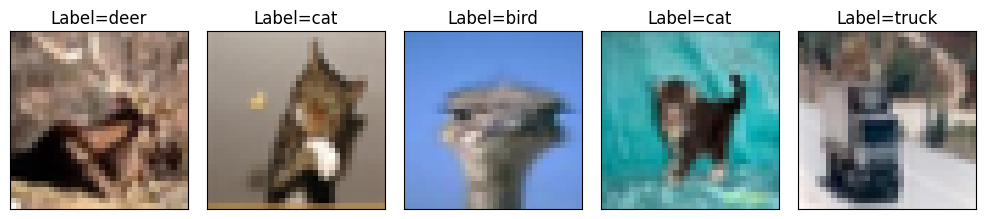

In [10]:
images, labels = cifar10.sample_pictures(train_flag=False, return_flag = True)

## Prediction of sampe test set

In [11]:
images,labels = images.to(device),labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(5)))

Predicted:   frog   dog  bird  bird   cat


## Evaluating Train Accuracy

In [12]:
from evaluate import *
calAccuracy(net, trainloader, device)

Accuracy of the network on the  train images: 67.234 %%


## Evaluating Test Accuracy

In [13]:
calAccuracy(net, testloader, device)

Accuracy of the network on the  train images: 70.37 %%


## Evaluating test Accuracy over different classes

In [14]:
calClassAccuracy(net, testloader,classes, device)

Accuracy of plane : 77 %
Accuracy of   car : 76 %
Accuracy of  bird : 47 %
Accuracy of   cat : 29 %
Accuracy of  deer : 63 %
Accuracy of   dog : 67 %
Accuracy of  frog : 71 %
Accuracy of horse : 72 %
Accuracy of  ship : 78 %
Accuracy of truck : 73 %


## Misclassified Images

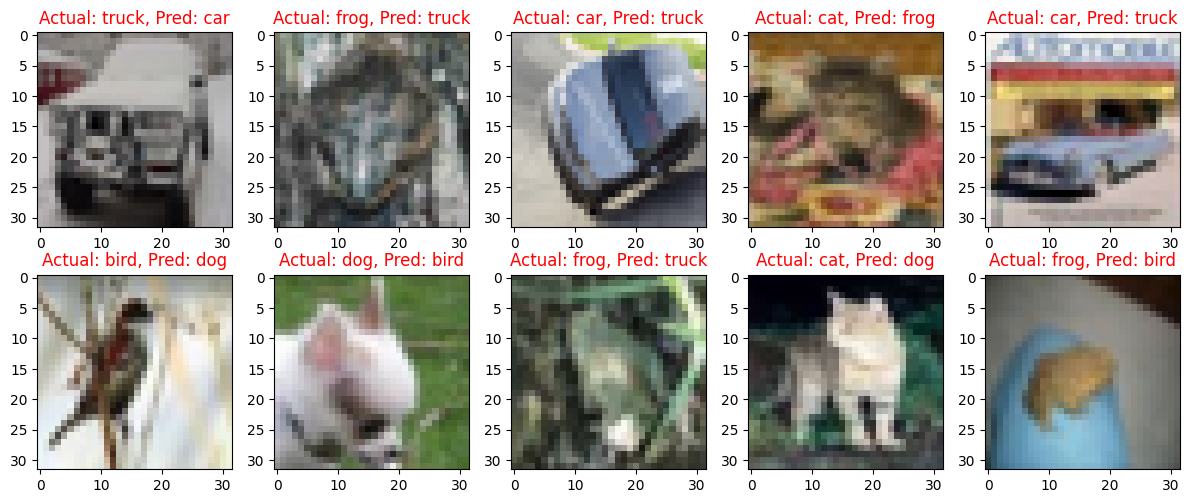

In [15]:
from utils import plot_misclassified_images
plot_misclassified_images(net, testloader, classes, device)